# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [ ]:
import pandas as pd

In [ ]:
df_loan = pd.read_csv("/content/D_loan.csv")
df_closed_loan = pd.read_csv("/content/D_close_loan.csv")

In [ ]:
df_loan.isna().sum()

ID_LOAN      0
ID_CLIENT    0
dtype: int64

In [ ]:
df_closed_loan.isna().sum()

ID_LOAN      0
CLOSED_FL    0
dtype: int64

Так как пустых значений нет, то мы объединяем таблицы.

In [ ]:
df_loan = df_loan.merge(df_closed_loan, left_on=['ID_LOAN'], right_on=['ID_LOAN'])

Получим новые колонки: CREDIT_AMOUNT - общее количество кредитов, CLOSED - количество закрытых кредитов клиента.

In [ ]:
df_loan['CREDIT_AMOUNT'] = df_loan.groupby('ID_CLIENT')['CLOSED_FL'].transform('size')

In [ ]:
df_loan['CLOSED'] = df_loan.groupby('ID_CLIENT')['CLOSED_FL'].cumsum()

In [ ]:
df_loan.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL,CREDIT_AMOUNT,CLOSED
0,1753790658,106804370,1,1,1
1,1753790659,106804371,1,1,1
2,1753790660,106804372,1,2,1
3,1753790661,106804372,0,2,1
4,1753790662,106804373,1,1,1


В последующим нам не потребуются эти колонки, так что для упрощения жизни удалим их сразу: ID_LOAN и CLOSED_FL

In [ ]:
df_loan.drop(['CLOSED_FL', 'ID_LOAN'], axis=1, inplace=True)

Так как до этого при группировке я использовала кумулятивную сумму, то сейчас все дубликаты можно спокойно удалить, так как нас интересует общая информация по клиенту, а не по каждому кредиту.

In [ ]:
df_loan = df_loan.drop_duplicates(subset=['ID_CLIENT'], keep='first')

In [ ]:
df_clients = pd.read_csv("/content/D_clients.csv")

In [ ]:
df_clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [ ]:
df_clients.duplicated(keep=False).sum()

0

In [ ]:
df_clients.duplicated(subset=['ID']).sum()

0

Отлично, в главной таблице у нас нет дубликатов. Оценим значения возраста так как они в дальнейшем будут использоваться.

<ipython-input-148-5a0ca0276180>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clients['AGE'])


<Axes: xlabel='AGE', ylabel='Density'>

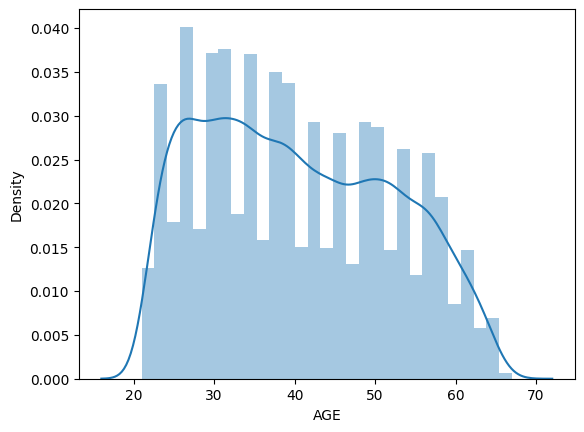

In [ ]:
import seaborn as sns
sns.distplot(df_clients['AGE'])

<Axes: >

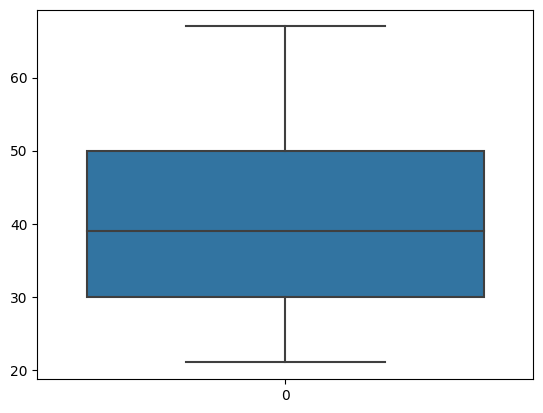

In [ ]:
sns.boxplot(df_clients['AGE'])

AGE выглядит приемлимо, и выбросов нет.  
Проверим что в GENDER у нас всего два пола)

In [ ]:
df_clients.GENDER.value_counts()

1    10452
0     5548
Name: GENDER, dtype: int64

In [ ]:
df_agreement = pd.read_csv("/content/D_target.csv")

In [ ]:
df_agreement.duplicated(subset=['ID_CLIENT']).sum()

0

In [ ]:
df_agreement.duplicated(keep=False).sum()

0

Отлично, в таблице Agreement дублей нет, а большего нам и не надо для объединения.

In [ ]:
df_salary = pd.read_csv('/content/D_salary.csv')

In [ ]:
df_salary.isna().sum()

FAMILY_INCOME      0
PERSONAL_INCOME    0
ID_CLIENT          0
dtype: int64

Посмотрим на дубликаты в Salary

In [ ]:
df_salary.duplicated(subset=['ID_CLIENT']).sum()

300

In [ ]:
ids = df_salary["ID_CLIENT"]
df_salary[ids.isin(ids[ids.duplicated()])].sort_values("ID_CLIENT")


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
5533,от 10000 до 20000 руб.,5000.0,106804370
9309,от 10000 до 20000 руб.,5000.0,106804370
1331,от 10000 до 20000 руб.,11000.0,106804441
6524,от 10000 до 20000 руб.,11000.0,106804441
7248,от 10000 до 20000 руб.,3000.0,106804476
...,...,...,...
4648,от 10000 до 20000 руб.,7500.0,106819542
1508,от 20000 до 50000 руб.,30000.0,106819543
3693,от 20000 до 50000 руб.,30000.0,106819543
13053,от 10000 до 20000 руб.,12000.0,106819549


Так как это просто дубликаты, то беспощадно их удалим, оставив первую строку.

In [ ]:
df_salary = df_salary.drop_duplicates(subset=['ID_CLIENT'], keep='first')

Посмотрим на распределение Personal_income.

<ipython-input-159-9f2aadc94ddf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_salary['PERSONAL_INCOME'])


<Axes: xlabel='PERSONAL_INCOME', ylabel='Density'>

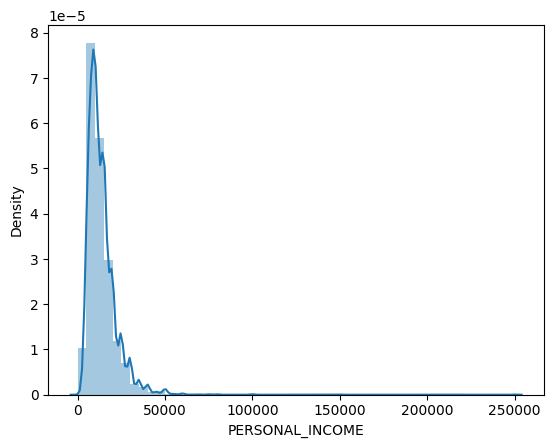

In [ ]:
sns.distplot(df_salary['PERSONAL_INCOME'])

<Axes: >

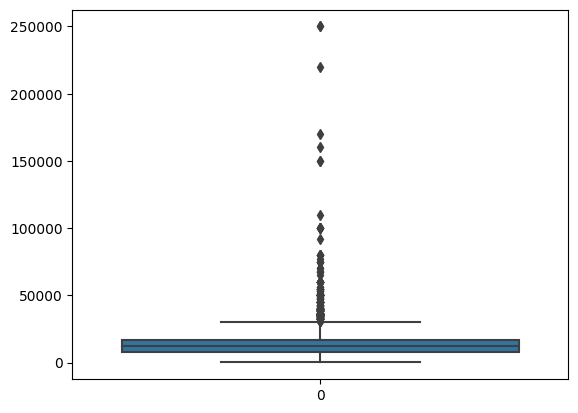

In [ ]:
sns.boxplot(df_salary['PERSONAL_INCOME'])

In [ ]:
df_salary['PERSONAL_INCOME'].describe()

count     15223.000000
mean      13853.836323
std        9015.467617
min          24.000000
25%        8000.000000
50%       12000.000000
75%       17000.000000
max      250000.000000
Name: PERSONAL_INCOME, dtype: float64

Вот с рапределением Personal income беда. 25% выборки представлены разбросом от 18000 до 250000. Еще 25% выборки имеют разброс от 0 до 8000. Посчитаем какой процент выборки займет наша обрезка.

In [ ]:
(df_salary.loc[(df_salary['PERSONAL_INCOME']<7000)|(df_salary['PERSONAL_INCOME']>20000)].shape[0]/df_salary.shape[0])*100

25.14616041516127

Примем во внимание, что есть люди с очень высоким доходом и попробуем сделать ограничени до 80 тысяч, руководсвуясь ящиком с усами. И минимальный порогпоставим в 5 тысяч, для людей с очень маленьким доходом. Такая обрезка составит всего 2% от выборки.

In [ ]:
(df_salary.loc[(df_salary['PERSONAL_INCOME']<5000)|(df_salary['PERSONAL_INCOME']>80000)].shape[0]/df_salary.shape[0])*100

2.305721605465414

In [ ]:
df_salary.shape

(15223, 3)

In [ ]:
df_salary =  df_salary[(df_salary['PERSONAL_INCOME']>5000)&(df_salary['PERSONAL_INCOME']<=80000)]

In [ ]:
df_salary.shape

(14419, 3)

А теперь объединим то, что имеется на данный момент.

In [ ]:
df = df_clients.merge(df_agreement,left_on='ID', right_on='ID_CLIENT').merge(df_salary,left_on='ID', right_on='ID_CLIENT').drop(columns=['POSTAL_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','FAMILY_INCOME','REG_ADDRESS_PROVINCE'])

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,ID_CLIENT_x,TARGET,PERSONAL_INCOME,ID_CLIENT_y
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,1,0,60099204,106805103,1,25000.0,106805103
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,0,0,62244665,106809308,0,10000.0,106809308
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,0,1,61050759,106805867,0,30000.0,106805867
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,1,1,62079659,106808779,0,25000.0,106808779
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,1,0,66583553,106814289,0,15000.0,106814289


У нас подтянулась пара лишних колонок, избавимся от них сразу.

In [ ]:
df.drop(['ID_CLIENT_y','ID_CLIENT_x'], axis=1, inplace=True)

Таблица job меня интересует только из-за времени работы. посмотрим на его распределение.

In [ ]:
df_job = pd.read_csv("/content/D_job.csv")

<ipython-input-172-45b726dbb10a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_job['WORK_TIME'])


<Axes: xlabel='WORK_TIME', ylabel='Density'>

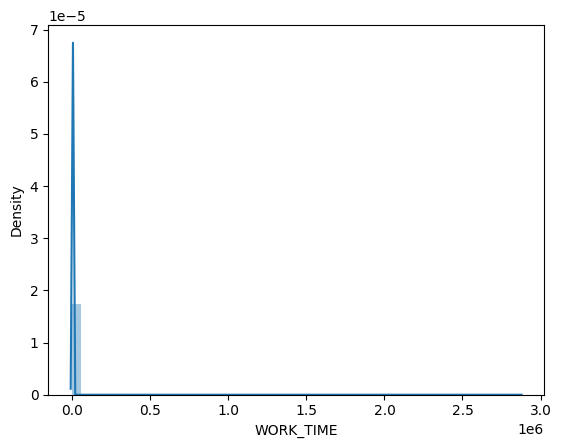

In [ ]:
sns.distplot(df_job['WORK_TIME'])

Нда, в таком случае я лучше опущу эту таблицу совсем, так как в реальном банковском секторе редко смотрят на должность или отрасль (из опыта)

In [ ]:
df = df.merge(df_loan, left_on='ID', right_on='ID_CLIENT')

Создадим колонку PROPERTY - в которой будет одно будево значение - есть собственность или нет (машина или например квартира).

In [ ]:
df['PROPERTY'] = df.apply(lambda x: 1 if (x['FL_PRESENCE_FL']==1) | (x['OWN_AUTO']==1) else 0, axis=1)

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,PERSONAL_INCOME,ID_CLIENT,CREDIT_AMOUNT,CLOSED,PROPERTY
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,1,0,60099204,1,25000.0,106805103,1,0,1
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,0,0,62244665,0,10000.0,106809308,1,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,0,1,61050759,0,30000.0,106805867,1,1,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,1,1,62079659,0,25000.0,106808779,1,0,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,1,0,66583553,0,15000.0,106814289,2,1,1


In [ ]:
df.dtypes

ID                     int64
AGE                    int64
GENDER                 int64
EDUCATION             object
MARITAL_STATUS        object
CHILD_TOTAL            int64
DEPENDANTS             int64
SOCSTATUS_WORK_FL      int64
SOCSTATUS_PENS_FL      int64
FL_PRESENCE_FL         int64
OWN_AUTO               int64
AGREEMENT_RK           int64
TARGET                 int64
PERSONAL_INCOME      float64
ID_CLIENT              int64
CREDIT_AMOUNT          int64
CLOSED                 int64
PROPERTY               int64
dtype: object

Удалим лишнее

In [ ]:
df.drop(['ID','FL_PRESENCE_FL','OWN_AUTO','ID_CLIENT'], axis=1, inplace=True)

In [ ]:
df.shape

(14419, 14)

In [ ]:
df.to_csv("clients.csv")